# Load the data and make a datetime index 

In [1]:
import pandas as pd 
# loading data 
df = pd.read_csv("london_weather_MODIFIED - london_weather_MODIFIED.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [2]:
#Convert the date column to datetime dtype.
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02


In [3]:
# Set the date column as the index.
df = df.set_index('datetime')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
# Filter out only the required data
## Keep only data from the year 2000 or later.
## Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head(5)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [5]:
# calculate the number of missing values 
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

we have missing values in all features

In [6]:
# filling missing value
df['precipitation'] = df['precipitation'].fillna(0)
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['snow_depth'] = df['snow_depth'].fillna(0)

In [7]:
# confrm changes 
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

In [25]:
ts = df['precipitation'].copy()
ts.head()

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Name: precipitation, dtype: float64

In [26]:
# preview the index
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

the frequency is "none". the measurment we have are for each day. so we will set the frequency. 

In [27]:
# setting the frequency to daily 
ts = ts.asfreq('D')
# preview the index again
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq='D')

In [69]:
# Resample to monthly frequency and sum the precipitation
ts_M_res = df['precipitation'].resample('M').sum()
ts_M_res

datetime
2000-01-31     14.3
2000-02-29     62.2
2000-03-31     13.4
2000-04-30     71.8
2000-05-31     68.4
              ...  
2020-08-31     45.2
2020-09-30     19.2
2020-10-31    143.4
2020-11-30     47.8
2020-12-31     56.4
Freq: M, Name: precipitation, Length: 252, dtype: float64

In [70]:
# Select period between 2000 and 2010
precip_M_2000_2010 = ts_M_res.loc['2000':'2010']
precip_M_2000_2010

datetime
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [71]:
# Set a variable called max_prec for the max precipitation
max_prec = precip_M_2000_2010.max()
max_prec

138.4

In [72]:
# Set a variable called max_prec_index for the max precipitation
max_prec_index = precip_M_2000_2010.idxmax()
# Setting format (month year)
max_prec_date = max_prec_index.strftime("%B %Y")
max_prec_date

'November 2009'

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

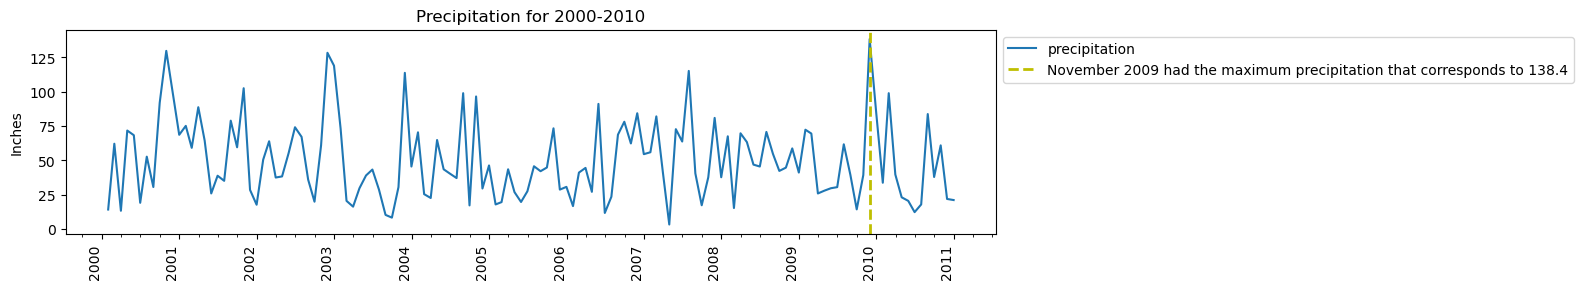

In [74]:
# Plot precipitation for the time period between 2000 and 2010 
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(precip_M_2000_2010.index, precip_M_2000_2010, label='precipitation')

# Customize major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor ticks
minor_loc = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)

# Rotate and format the x-axis labels
fig.autofmt_xdate(rotation=90)

# Set the title and the ylabel
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

# Add a vertical line for max_prec 
ax.axvline(max_prec_index, color='y', linestyle='--', linewidth=2, label=f"{max_prec_date} had the maximum precipitation that corresponds to {max_prec}")

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Display fig
plt.show()

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [75]:
# Resample to  frequency and sum the precipitation
ts2 = df['mean_temp'].copy()
ts2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

In [76]:
# set frequency to daily
ts2 = ts2.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq='D')

In [77]:
# resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
ts2_res_Y = ts2.resample("YS").mean()
ts2_res_Y

datetime
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
2005-01-01    11.822877
2006-01-01    12.290822
2007-01-01    11.944384
2008-01-01    11.326776
2009-01-01    11.721644
2010-01-01    10.657397
2011-01-01    12.366438
2012-01-01    11.300956
2013-01-01    11.166301
2014-01-01    12.658904
2015-01-01    12.123699
2016-01-01    11.906284
2017-01-01    12.242466
2018-01-01    12.501370
2019-01-01    12.206164
2020-01-01    12.723634
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [78]:
# Determine the year and value for the lowest mean temp.
min_mean_temp = ts2_res_Y.min()
min_mean_temp_index = ts2_res_Y.idxmin()
min_mean_temp_date = min_mean_temp_index.strftime("%Y")

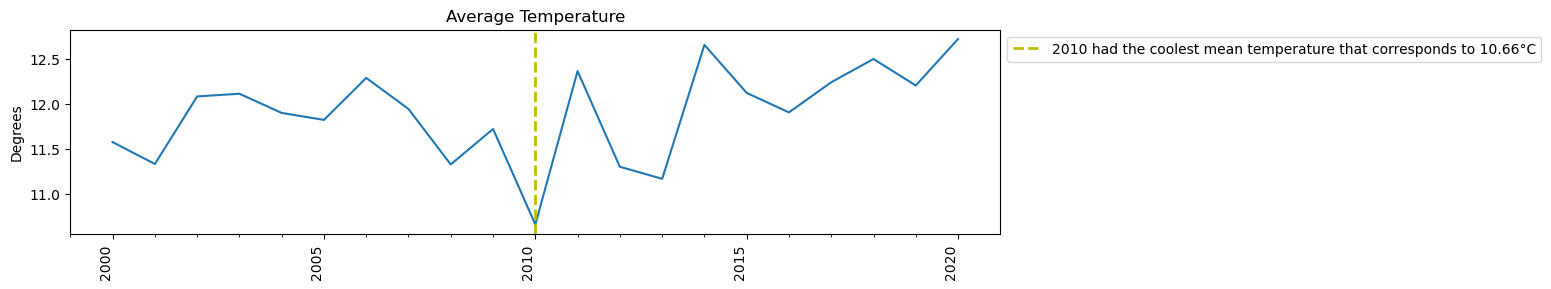

In [81]:
# Plot average temperature for the time period between 2000 and 2020 
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(ts2_res_Y.index, ts2_res_Y)

# Set the title and the ylabel
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')

# Customize major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor ticks
minor_loc = mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

# Rotate and format the x-axis labels
fig.autofmt_xdate(rotation=90)

# Add a vertical line for max_prec 
ax.axvline(min_mean_temp_index, color='y', linestyle='--', linewidth=2, 
           label=f"{min_mean_temp_date} had the coolest mean temperature that corresponds to {min_mean_temp:.2f}°C")

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

plt.show();